In [ ]:
#The first cell content of the .ipynb notebook should be as follows:
# A6
# Sujeet kumar
# Amrendra Kumar Singh
# Ritesh Raj Kumar

In [77]:
from pandas import read_csv
from pandas import DataFrame
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randint
import seaborn as sns
from kmodes import kmodes
from sklearn.decomposition import PCA


# Load the CSV file 
dataset = pd.read_csv('data.csv')
modDfObj = dataset
modDfObj.isnull().sum(axis = 0)
#Remove the Recruitment Contact and Post until attributes These attributes are insginificant and most of the values are NAN

modDfObj = dataset.drop(['Recruitment Contact','Post Until'],axis='columns')
modDfObj.columns = [c.replace(' ', '_') for c in modDfObj.columns]
modDfObj.isnull().sum(axis = 0)

# Impute the missing data in five colums with new values  
modDfObj[["Full-Time/Part-Time_indicator"]] = modDfObj[["Full-Time/Part-Time_indicator"]].fillna(value="Missing-Time")
modDfObj[["Hours/Shift"]] = modDfObj[["Hours/Shift"]].fillna(value="Missing-Hour/shift")
modDfObj[["Work_Location_1"]] = modDfObj[["Work_Location_1"]].fillna(value="Missing_Work_Location_1")
modDfObj[["Preferred_Skills"]] = modDfObj[["Preferred_Skills"]].fillna(value="Missing_Preferred_Skills")
modDfObj[["Additional_Information"]] = modDfObj[["Additional_Information"]].fillna(value="Missing_Additional_Info..")

modDfObj.isnull().sum(axis = 0) 

# drop the rows which has NAN so all records will be not NAN.. Dropping 16 rows ( Job Category 2+Mim Qual Requi 14)
modDfObj.dropna(inplace=True)
modDfObj.isnull().sum(axis = 0) 

# Labeld the preferred skills .. Create new columnn and map with preferred skills 
Preferred_Skills = np.unique(modDfObj['Preferred_Skills'])
gle = LabelEncoder()
genre_labels  = gle.fit_transform(modDfObj['Preferred_Skills'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings
modDfObj['Prefskill'] = genre_labels
modDfObj[['Preferred_Skills', 'Prefskill']].iloc[1:7]

# Labeld the preferred skills .. Create new columnn and map with preferred skills 
Job_Category = np.unique(modDfObj['Job_Category'])
gle2 = LabelEncoder()
genre_labels2  = gle2.fit_transform(modDfObj['Job_Category'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle2.classes_)}
genre_mappings
modDfObj['jobCategoryCode'] = genre_labels
modDfObj[['Job_Category', 'jobCategoryCode']].iloc[1:7]

# calculated Average salary of each skills..
modDfObj['Average_Salary'] =  modDfObj['Salary_Range_From'] + (modDfObj['Salary_Range_To'] - modDfObj['Salary_Range_From']) / 2 
# Add column salry Normalizatino
modDfObj['Salary_normalization'] = np.where(modDfObj['Salary_Frequency'] == 'Hourly' ,2920, np.where(modDfObj['Salary_Frequency'] =="Daily", 365, 1))

# converting Hourly and daily salary into Annual .. 
#Assumption - 8 hrs /day and 365 days/annual

modDfObj['Salary_Range_From'] = modDfObj['Salary_Range_From']*modDfObj['Salary_normalization']
modDfObj['Salary_Range_To'] = modDfObj['Salary_Range_To']*modDfObj['Salary_normalization']
modDfObj['Average_Salary'] = modDfObj['Average_Salary']*modDfObj['Salary_normalization']
modDfObj[['Salary_Range_From','Salary_Range_To','Average_Salary','Salary_Frequency','Salary_normalization']]

,Salary_Range_From,Salary_Range_To,Average_Salary,Salary_Frequency,Salary_normalization
2,51907.68,54580.32,53244.0,Annual,1
3,51907.68,54580.32,53244.0,Annual,1
4,102200.00,102200.00,102200.0,Hourly,2920
5,102200.00,102200.00,102200.0,Hourly,2920
6,50598.00,85053.00,67825.5,Annual,1
7,50623.00,75083.00,62853.0,Annual,1
8,90000.00,110000.00,100000.0,Annual,1
9,62942.00,92249.00,77595.5,Annual,1
10,62942.00,92249.00,77595.5,Annual,1
11,30683.00,49707.00,40195.0,Annual,1


In [78]:
# Solution for Question no 1 and Question no 2 
# Highest paid skills decided based on the Higest Average salary of skills 

# drop duplicates to get unique pref skills
modDfObj = modDfObj.drop_duplicates('Prefskill')

# sort basis on Average salary to get the highest paid skills 
modDfObj = modDfObj.sort_values(by=['Average_Salary'],axis=0, ascending=False)

modDfObj[['Prefskill','Salary_Range_From','Salary_Range_To','Average_Salary','Salary_Frequency','Salary_normalization']]


,Prefskill,Salary_Range_From,Salary_Range_To,Average_Salary,Salary_Frequency,Salary_normalization
2522,1152,239440.000,239440.000,239440.000,Hourly,2920
411,28,214240.400,229482.800,221861.600,Hourly,2920
1960,683,218587.000,218587.000,218587.000,Annual,1
417,684,209585.000,209585.000,209585.000,Annual,1
1873,510,200931.000,214848.000,207889.500,Annual,1
1399,621,180472.000,225217.000,202844.500,Annual,1
39,460,198518.000,198518.000,198518.000,Annual,1
1512,930,185000.000,195000.000,190000.000,Annual,1
2805,1296,183200.800,183200.800,183200.800,Daily,365
277,639,175000.000,190000.000,182500.000,Annual,1


In [64]:
# Continuation of Answer of Question no 1 and Question no 2 ..Each niche skills and respective 
#job category is displayed below in order
pd.set_option('display.max_colwidth', -1)
modDfObj[['Prefskill','Preferred_Skills' ,'Job_Category']]


,Prefskill,Preferred_Skills,Job_Category
2522,1152,"â€¢\tProven ability to work collaboratively with high-level officials at City Hall, the Deputy Mayorâ€™s Office, and the Mayorâ€™s Office of Operations. â€¢\tStrong familiarity with previous interagency data-sharing efforts. â€¢\tStrong familiarity with the base data products produced by DoITT and DCP. â€¢\tKnowledge of the foundational spatial data requirements of NYC public safety agencies. â€¢\tStrong understanding of existing mechanisms for sharing data among City agencies. â€¢\tStrong understanding of the variety of data needed for optimal emergency response. â€¢\tUnderstanding of the constraints on optimal data sharing observed during emergency response. â€¢\tStrong understanding of typical deployment of the Esri suite of GIS software at City agencies. â€¢\tStrong background in managing data management staff. â€¢\tProven ability to work with partnering agencies on data / application governance committees. â€¢\tDemonstrated ability to organize and conduct large meetings and synthesize their outcomes. â€¢\tKnowledge of the general development and use of GIS among City agencies.","Technology, Data & Innovation"
411,28,"--Board Certification in Pediatrics or Adolescent Health - Effective communication and interpersonal skills - Proficiency in internet usage and computer software programs, such as Microsoft Word, Excel, and Outlook - Master's Degree in Public Health (M",Health
1960,683,"The Deputy Commissioner position requires excellent leadership, communication and client service skills as well as a passion for driving innovation, continuous improvement and efficiency, and implementing workforce strategies to recruit, develop and retain the most qualified and diverse talent in a customer service environment. The selected candidate will be expected to work closely with Agency and oversight counterparts and must have excellent management skills focused on staff alignment with the Bureauâ€™s vision, goals and career development. In addition, he/she must be an effective team player, capable of sustaining a culture of excellence in the delivery of customer service to internal partners and possess the ability to establish and maintain effective external partnerships and collaboration. Specifically, the following skills and abilities are required to be successful in this role: â€¢\t7-10 years relevant work experience leading customer focused functions, of which at least 3 years must have been in a senior leadership position â€¢\tBA/BS degree; MBA/advanced degree preferred â€¢\tStrong analytical skills, with ability to interpret data and trends, diagnose problems, and implement action plans to resolve issues â€¢\tOutstanding written and oral communication skills â€¢\tComfort in managing concurrent projects in a fast-paced, results-driven environment with equal enthusiasm for high-level strategic planning and tactical daily execution â€¢\tIn-depth knowledge of Federal, City and State governmental rules and regulations related to the position; NYC experience is a plus. â€¢\tProficiency in Microsoft Office Suite","Administration & Human Resources Finance, Accounting, & Procurement Building Operations & Maintenance"
417,684,"The Deputy Commissioner position requires: -\texcellent communication and client service skills to work closely and effectively with Agency, oversight counterparts, and the media; -\tdemonstrated success in leading, overseeing and facilitating innovations and improvements in water distribution and sewer operations as described above; -\texperience in or with public water systems; -\tability to report quickly to emergency situations in all five boroughs around the clock; -\texcellent management and leadership skills that will inspire Bureau staff to sustain a work environment, operations and strategic initiatives that are aligned with DEPâ€™s vision, mission, values and goals; -\tability to be an effective team player and capable of sustaining a culture of excellen

In [79]:
# Top job categories ( as per Average salary ) and salary range is displayed below 
pd.set_option('display.max_colwidth', -1)
# Drop duplicates job category 
modDfObj = modDfObj.drop_duplicates('Job_Category')
modDfObj[['jobCategoryCode','Job_Category','Salary_Range_From','Salary_Range_To']]

,jobCategoryCode,Job_Category,Salary_Range_From,Salary_Range_To
2522,1152,"Technology, Data & Innovation",239440.000,239440.000
411,28,Health,214240.400,229482.800
1960,683,"Administration & Human Resources Finance, Accounting, & Procurement Building Operations & Maintenance",218587.000,218587.000
417,684,"Engineering, Architecture, & Planning Finance, Accounting, & Procurement Building Operations & Maintenance Public Safety, Inspections, & Enforcement",209585.000,209585.000
1873,510,"Administration & Human Resources Constituent Services & Community Programs Communications & Intergovernmental Affairs Engineering, Architecture, & Planning Finance, Accounting, & Procurement Health Technology, Data & Innovation Legal Affairs Building Operations & Maintenance Policy, Research & Analysis Public Safety, Inspections, & Enforcement Social Services",200931.000,214848.000
1399,621,"Communications & Intergovernmental Affairs Legal Affairs Policy, Research & Analysis",180472.000,225217.000
39,460,"Engineering, Architecture, & Planning Maintenance & Operations",198518.000,198518.000
1512,930,"Policy, Research & Analysis",185000.000,195000.000
2805,1296,Building Operations & Maintenance,183200.800,183200.800
1845,934,"Engineering, Architecture, & Planning",177652.800,177652.800


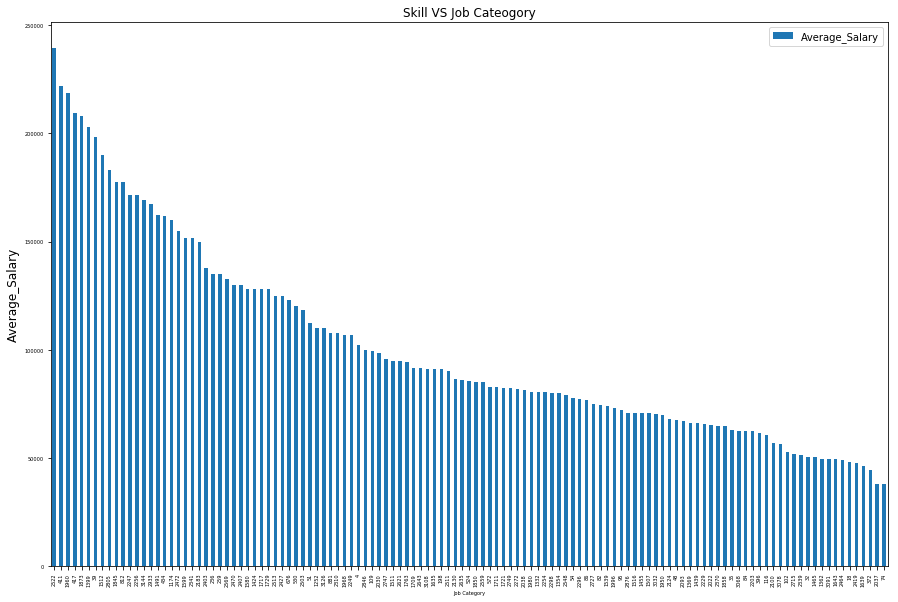

In [80]:
#plotting "skills vs Category for visualization purpose  "
ax = modDfObj[['Average_Salary','Job_Category']].plot(kind='bar', title ="Skill VS Job Cateogory", figsize=(15, 10), legend=True, fontsize=5);
ax.set_xlabel("Job Category", fontsize=5)
ax.set_ylabel("Average_Salary", fontsize=12)
plt.show()

In [81]:
#Added the experience column which we have extracted from Minimum Qualification in case of mentioned different 
#experience in deferent desired filed it's being taken on random basis 
# modDfObj3 is created for Problem no 3

modDfObj['Experience'] = [ '3','2','1.5','3','2','0','6','5','10','0','1.5','5','5','4','1.5','3','1.8','4','4',
       '5','1.5','4','0','5','6','3','4','4','4','6','5','6','3','5','6','4','8','2','1.5','6','1.5','1.5',
       '5','5','5','4','4','1','2','1','1.5','5','4','4','2','2','4','0','2','2','5','4','1','1','4','4','1',
       '3','5','1','5','2','2','2','1','1','1','3','2','2','2','1','1','2','1','1','1','2','2','1','1.5','6',
       '1.5','1','2','1','2','3','1.5','2','6','2','2','2','0','2','3','0','0','2.5','1','3','4','4','1','4',
       '0','0','1','1','0']
modDfObj

,Job_ID,Agency,#_Of_Positions,Business_Title,Civil_Service_Title,Title_Code_No,Level,Job_Category,Full-Time/Part-Time_indicator,Salary_Range_From,...,Work_Location_1,Residency_Requirement,Posting_Date,Posting_Updated,Process_Date,Prefskill,jobCategoryCode,Average_Salary,Salary_normalization,Experience
2522,400526,OFFICE OF EMERGENCY MANAGEMENT,1,INTER-AGENCY DATA MANAGER,EMERGENCY PREPAREDNESS MANAGER,6765,0,"Technology, Data & Innovation",P,239440.000,...,"165 Cadman Plaza East Brooklyn, NY 11201","New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.",2019-07-26T00:00:00.000,2019-07-26T00:00:00.000,2019-08-20T00:00:00.000,1152,1152,239440.00,2920,3
411,319959,DEPT OF HEALTH/MENTAL HYGIENE,1,"Field Doctor, Bureau of School Health/SH Medical",CITY MEDICAL SPECIALIST (PART-,53040,1,Health,P,214240.400,...,Missing_Work_Location_1,New York City Residency is not required for this position,2018-01-22T00:00:00.000,2018-03-29T00:00:00.000,2019-08-20T00:00:00.000,28,28,221861.60,2920,2
1960,396521,DEPT OF ENVIRONMENT PROTECTION,1,"Deputy Commissioner, Bureau of Customer Services",DEPUTY COMMISSIONER (DEP),95275,M7,"Administration & Human Resources Finance, Accounting, & Procurement Building Operations & Maintenance",F,218587.000,...,59-17 Junction Blvd Corona NY,"New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.",2019-05-28T00:00:00.000,2019-05-31T00:00:00.000,2019-08-20T00:00:00.000,683,683,218587.00,1,1.5
417,321554,DEPT OF ENVIRONMENT PROTECTION,1,"Deputy Commissioner, Water and Sewer Operations",DEPUTY COMMISSIONER (DEP),95275,M7,"Engineering, Architecture, & Planning Finance, Accounting, & Procurement Building Operations & Maintenance Public Safety, Inspections, & Enforcement",F,209585.000,...,"96-05 Horace Harding Expressway, Queens, NY",New York City residency is required within 90 days of appointment.,2018-01-26T00:00:00.000,2018-01-26T00:00:00.000,2019-08-20T00:00:00.000,684,684,209585.00,1,3
1873,395848,DEPT. OF HOMELESS SERVICES,1,DHS FIRST DEPUTY COMMISSIONER,DEPUTY COMMISIONER(HOMELESS SE,95652,M7,"Administration & Human Resources Constituent Services & Community Programs Communications & Intergovernmental Affairs Engineering, Architecture, & Planning Finance, Accounting, & Procurement Health Technology, Data & Innovation Legal Affairs Building Operations & Maintenance Policy, Research & Analysis Public Safety, Inspections, & Enforcement Social Services",F,200931.000,...,"33 Beaver St, New York NY","New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.",2019-05-20T00:00:00.000,2019-07-09T00:00:00.000,2019-08-20T00:00:00.000,510,510,207889.50,1,2
1399,388126,OFFICE OF MANAGEMENT & BUDGET,1,BUDGET ANALYST (OMB)-MANAGERIA,BUDGET ANALYST (OMB)-MANAGERIA,0608A,M6,"Communications & Intergovernmental Affairs Legal Affairs Policy, Research & Analysis",F,180472.000,...,255 Greenwich Street,"New York City residency is generally required within 90 days of appointment. However, City Employees in certain title

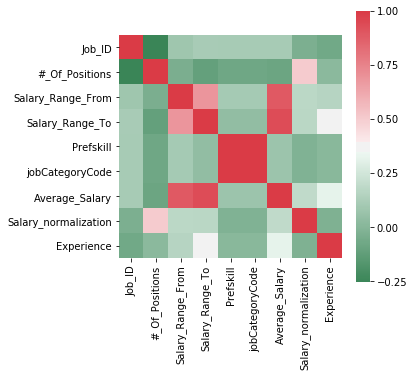

In [82]:
# Below code is for Correlatoin matrix of columns .. some of the Column not taken as it is not required 
f, ax = plt.subplots(figsize=(5,5))
# Converted the Experience from Object data type to float
modDfObj[['Experience']] = modDfObj[['Experience']].astype(float)
corr = modDfObj.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(500, 10, as_cmap=True),
           square=True, ax=ax)


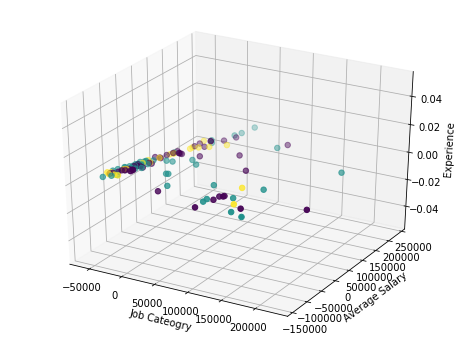

In [84]:
# Cluster Algorithm K mode and PCA technique is used and for Display purpose 3D visulization is used

features = ['jobCategoryCode', 'Average_Salary', 'Experience']

# Separating out the features
x = modDfObj.loc[:, features].values

df_dummy = pd.get_dummies(modDfObj3)

#transform into numpy array
i = df_dummy.reset_index().values

# Cluster Algorithm K -Modes 
km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(i)
df_dummy['clusters'] = clusters

# PCA is used for data visualization 
pca = PCA(3)

principalComponents = pca.fit_transform(x)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Setting the axis 
ax.set_xlabel('Job Cateogry')
ax.set_ylabel('Average Salary')
ax.set_zlabel('Experience')
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"], s=30)
plt.show()

In [ ]:
#Documentation - 

# Most of the Data Cleaning and dropping the Non Required colums and Reparing the missing data activiiy is being done in 
#Cell no 1. Few columns has been added also like Job category code and Experience . Experience is extracted from  MInimum
#Qualification , in case of more than one experience is mentioned than its taken on random basis .

#-------Answer of Question no 1 and Question no 2

# Answer of Question no 1 and Question no 2 ..
# Preferred job skiils in order according to Average salary are (Job code = 1152,526,28,0,683....so on ) and 
# Job Category for these niche skills are ( Technology,Data Innovation, Health,Administration and Health ..etc )
#Code for Above is upto cell no 10 

#-------Answer of Question no 1 and Question no 3
# For Clustering firstly we calculated and depcited correlation martrix to get the relation among the Columns 
#Normalizatoin/Scaling of data is  not required as it is done part of cleaning.We have usked 
# "K-Mode" Clustering algorithm and PCA technique followed by 3D Visualization 

# Reason for K mode Techiques is used becasue it's combination of Categorical and Numerical data .Also it is used
#distance based technique to measure the closenes of datapoint . 

# Worth Mentioning here that some of the fucntion like 'Transform' is taking to much time so another 
#options are explored and used

# Code and Analysis are documented in Cell itself for easy understanding purpose .